we will be developing a linear regression model to predict an individuals blood glucose level , an indicator of a type 2 diabetes risk , based on various health  and lifestyle-related factors , data set that we are using is pima indians diabetes dataset


# **STEP 1 : IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

# **STEP 2: LOAD THE DATASET PIMA**

In [ ]:
dataset = pd.read_csv('diabetes.csv')

# **STEP 3: DATA EXPLORATION AND PREPROCESSING**

In [ ]:
print(dataset.head())
print(dataset.describe())
rows,columns = dataset.shape
print(f'The dataset has {rows} rows and {columns} columns')
print(dataset.info())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.0

In [ ]:
dataset.drop('Outcome', axis=1, inplace=True)


***checking for missing value***

In [ ]:
missing_values = dataset.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


**REMOVES EVERY COLUMN WITH A MISSING VALUE**


In [ ]:
dataset.dropna(inplace=True)

# **SET UP DEPENDANT AND INDEPENDANT VARIABLES**


In [ ]:
x = dataset.drop(columns = 'Glucose')

In [ ]:
y = dataset['Glucose']

# ***DATA SPLITTING - TRAIN/TEST SPLIT METHOD***


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ***TRAIN MODEL - LINEAR REGRESSION MODELING***

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# ***MODEL EVALUATION***

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y.pred)
r2 = r2_score(y_test, y.pred)

print(f'mean squared error: {mse}')
print(f'R-squared: {r2:.2f}')


mean squared error: 869.4777053181734
R-squared: 0.14


# ***VISUALIZATION***

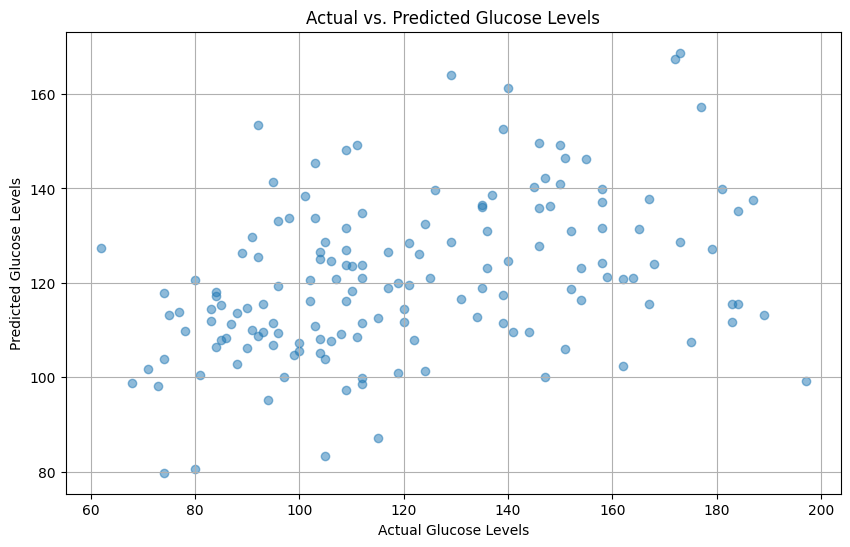

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Glucose Levels')
plt.ylabel('Predicted Glucose Levels')
plt.title('Actual vs. Predicted Glucose Levels')
plt.grid(True)
plt.show()

# ***INTERPRETATION***

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for feature, coef in zip(x.columns, coefficients):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")

Coefficients:
Pregnancies: 0.12
BloodPressure: 0.10
SkinThickness: -0.44
Insulin: 0.11
BMI: 0.77
DiabetesPedigreeFunction: 8.17
Age: 0.65
Intercept: 64.41


In [ ]:
correlation_matrix = dataset.corr()
correlation_with_glucose = correlation_matrix['Glucose'].drop('Glucose')  # exclude self-correlation
correlation_with_glucose.sort_values(ascending=False)


,Glucose
Insulin,0.331357
Age,0.263514
BMI,0.221071
BloodPressure,0.152590
DiabetesPedigreeFunction,0.137337
Pregnancies,0.129459
SkinThickness,0.057328


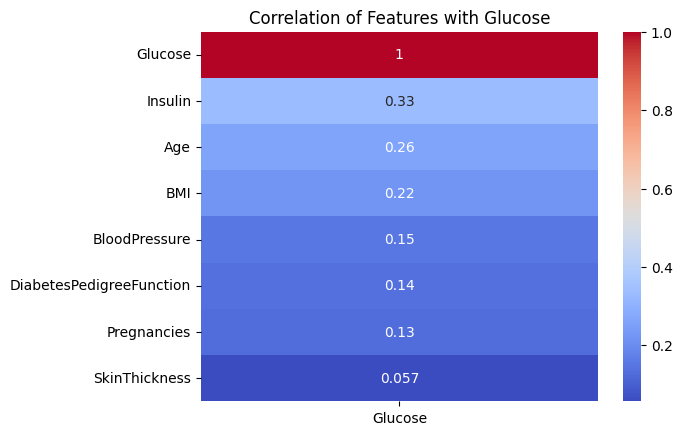

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dataset.corr()[['Glucose']].sort_values(by='Glucose', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Glucose")
plt.show()
